In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define File Path
complete = "ufc_complete.csv"

# Read CSV
data = pd.read_csv(complete)

In [3]:
target = data["Winner_Blue"]
target_names = ["Lost", "Won"]

In [4]:
data = data.drop("Winner_Blue", axis=1)
feature_names = data.columns
data.head()

,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_wins,B_avg_SIG_STR_pct,R_avg_TD_pct,R_age,R_avg_SIG_STR_landed,B_losses,B_win_by_Submission,B_draw,...,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,weight_buckets_Heavy,weight_buckets_Light,weight_buckets_Middle
0,0.0,1.0,2.0,0.650000,1.000000,34.0,8.500000,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
1,0.0,0.0,0.0,0.460000,0.250000,23.0,8.500000,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0
2,0.0,2.0,3.0,0.640000,0.826000,25.0,21.800000,1.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0
3,1.0,0.0,2.0,0.500000,0.333333,30.0,23.666667,0.0,0.0,0.0,...,1,0,0,0,1,0,0,1,0,0
4,1.0,2.0,5.0,0.716667,0.827143,26.0,20.714286,0.0,1.0,0.0,...,1,0,0,0,1,0,0,1,0,0


In [5]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6686674669867947

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [8]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.05143048201623793, 'B_avg_SIG_STR_landed'),
 (0.0417199043178151, 'R_avg_SIG_STR_pct'),
 (0.040003576391394756, 'R_avg_SIG_STR_landed'),
 (0.039600439053231004, 'B_avg_SIG_STR_pct'),
 (0.0395489474588501, 'R_age'),
 (0.03864624434148884, 'R_avg_TD_pct'),
 (0.03672657558885165, 'elevation (ft)'),
 (0.035226822102216684, 'R_avg_TD_landed'),
 (0.034573347101863425, 'R_total_rounds_fought'),
 (0.03118810898291634, 'B_age'),
 (0.030010427742641566, 'B_avg_TD_pct'),
 (0.029976424679190244, 'B_avg_TD_landed'),
 (0.029735875196583994, 'R_avg_SUB_ATT'),
 (0.027981881936831696, 'B_total_rounds_fought'),
 (0.026317870833092297, 'B_Reach_cms'),
 (0.025466705816512662, 'B_avg_SUB_ATT'),
 (0.023997841344675745, 'R_Reach_cms'),
 (0.023472844921604254, 'B_Height_cms'),
 (0.023414903092841038, 'R_Height_cms'),
 (0.02143504006044853, 'R_losses'),
 (0.021391876275016226, 'R_wins'),
 (0.019354076103052602, 'B_wins'),
 (0.018567836073037507, 'B_Weight_lbs'),
 (0.018170800703629544, 'R_Weight_lbs'),
 (0

In [9]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
First 10 Actual labels: [1, 1, 1, 1, 0, 1, 0, 1, 0, 0]


In [10]:
compare = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
compare.head(50)

,Prediction,Actual
0,0,1
1,1,1
2,0,1
3,0,1
4,0,0
5,1,1
6,0,0
7,0,1
8,1,0
9,0,0


In [11]:
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
values = []
names = []

for x in range(len(results)):
    values.append(results[x][0])
    names.append(results[x][1])

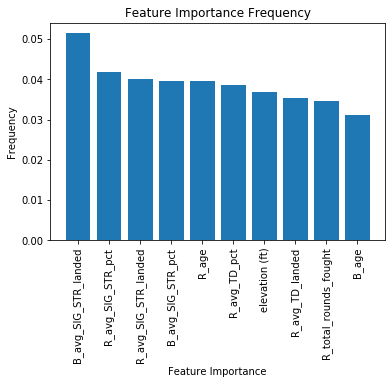

<Figure size 432x288 with 0 Axes>

In [12]:
# Plot Figure using pyplot
plt.figure()
plt.bar(names[0:10], values[0:10])

# Set xtixks, title, x labels, and y labels for the chart
plt.xticks(names[0:10], rotation="vertical")
plt.title("Feature Importance Frequency")
plt.ylabel("Frequency")
plt.xlabel("Feature Importance")


# Display Chart with Tight Layout
plt.show()
plt.tight_layout()